In [1]:
from pymarketng.application.Mechanism import Average_Mechanism, Macafee_mechanism, TradeReduction_mechanism, VCG_Mechanism
from pymarketng.application.BidManager import BidManager
from pymarketng.application.Plot import plot_demand_curves, plot_trades_as_graph

from pymarketng.domain.Bid import Bid
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
%matplotlib inline


In [2]:
# 1 Round of auction dataframe
n = 100
data = {
    "user": np.random.randint(1, 21, n),
    "type": np.random.randint(1, 4, n),
    "unit": np.random.randint(1, 100, n),
    "price": np.random.randint(0, 200, n),
    "buying": np.random.choice([True, False], n) ,
    "time": sorted([
        datetime.datetime(
            2022,
            np.random.randint(1, 13),
            np.random.randint(1, 28),
            np.random.randint(0, 24),
            np.random.randint(0, 60),
            np.random.randint(0, 60),
        )
        for _ in range(n)
    ]),
}
df = pd.DataFrame(data)
df

,user,type,unit,price,buying,time
0,3,2,14,39,False,2022-01-05 16:07:29
1,8,2,69,181,False,2022-01-05 21:58:24
2,7,3,44,114,True,2022-01-11 03:32:07
3,1,3,39,132,False,2022-01-13 21:00:59
4,17,1,66,93,False,2022-01-19 00:20:58
...,...,...,...,...,...,...
95,1,1,90,70,False,2022-12-04 04:20:12
96,10,2,46,88,True,2022-12-14 00:16:19
97,2,3,92,65,False,2022-12-19 09:56:44
98,18,2,49,41,True,2022-12-19 18:26:40


In [3]:
bm = BidManager()

# create bids from df
for index, row in df.iterrows():
    bm.add_bid(Bid(row["price"],row["user"],row["unit"],row["buying"],row["time"]))

bm.get_df()

,quantity,price,user,buying,time,divisible
0,44,114,7,True,2022-01-11 03:32:07,True
1,12,136,15,True,2022-01-19 10:11:10,True
2,99,67,6,True,2022-02-08 04:00:27,True
3,13,92,15,True,2022-02-08 21:16:37,True
4,82,106,4,True,2022-02-08 23:05:14,True
...,...,...,...,...,...,...
95,71,135,16,False,2022-11-24 13:21:13,True
96,11,138,5,False,2022-11-24 14:37:58,True
97,90,70,1,False,2022-12-04 04:20:12,True
98,92,65,2,False,2022-12-19 09:56:44,True


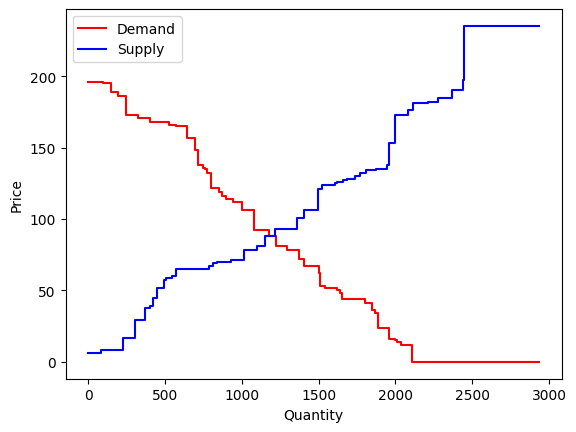

In [5]:
bm.plot()